In [15]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [17]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\preprocessed (1).csv")

In [18]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [19]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

<Figure size 1000x600 with 0 Axes>

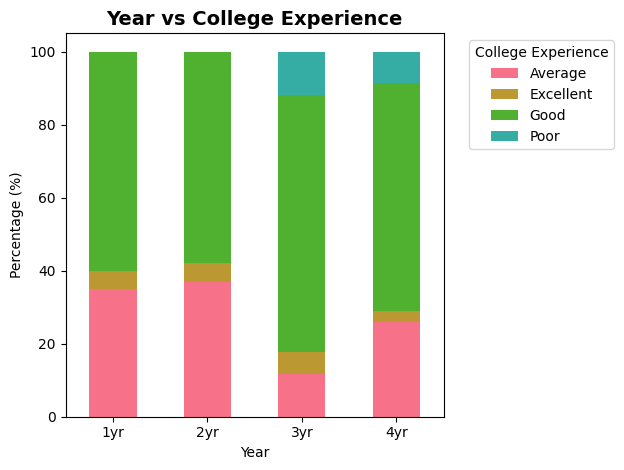

In [20]:
# 1. Year vs College Experience (Most Important)
plt.figure(figsize=(10, 6))
year_exp = df.groupby(['Year', 'College_experience']).size().unstack(fill_value=0)
year_exp_percentage = year_exp.div(year_exp.sum(axis=1), axis=0) * 100

year_exp_percentage.plot(kind='bar', stacked=True)
plt.title('Year vs College Experience', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='College Experience', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
#1st  and  2nd Year: Most challenging - highest "Average" experience (adjustment phase)

#Progressive Improvement: Experience gets better each year,

# 3rd and 4th Year: Peak satisfaction - highest "Good/Excellent" ratings
#Key Insight: Time and adaptation significantly improve with college experience.

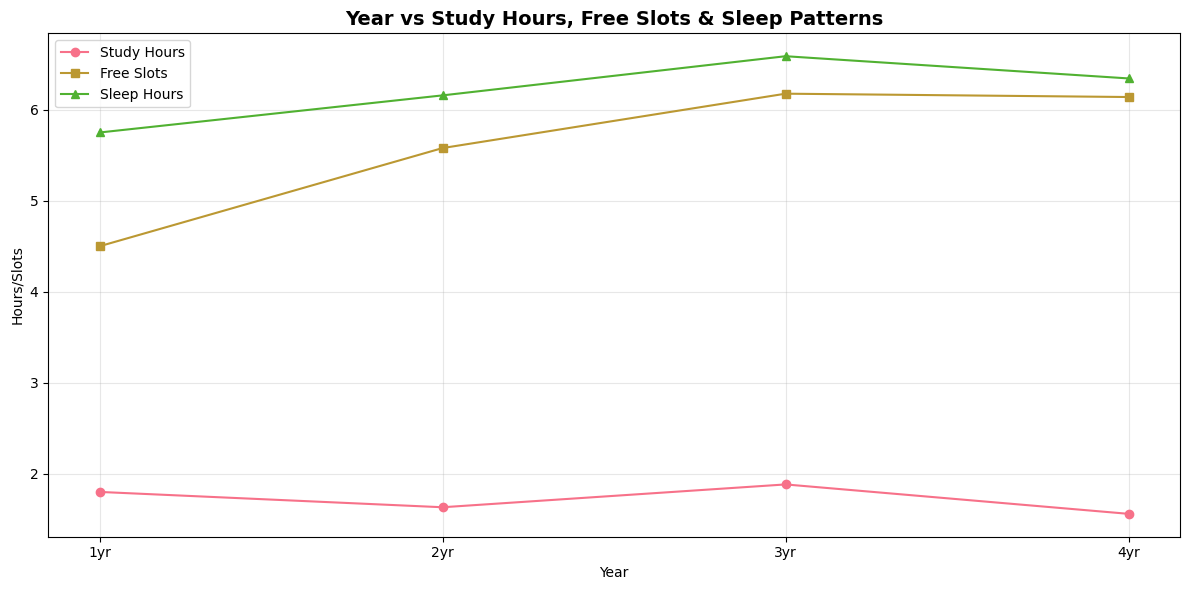

In [22]:
# 2. Year vs Study Hours, Free Slots, and Sleep (Combined line plot)
plt.figure(figsize=(12, 6))
study_by_year = df.groupby('Year')['Avg_study_hrs_per_day'].mean()
free_slots_by_year = df.groupby('Year')['Avg_free_slots_per_week'].mean()
sleep_by_year = df.groupby('Year')['Avg_sleeping_hrs_per_day'].mean()

plt.plot(study_by_year.index.astype(str), study_by_year.values, marker='o', label='Study Hours')
plt.plot(free_slots_by_year.index.astype(str), free_slots_by_year.values, marker='s', label='Free Slots')
plt.plot(sleep_by_year.index.astype(str), sleep_by_year.values, marker='^', label='Sleep Hours')

plt.title('Year vs Study Hours, Free Slots & Sleep Patterns', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Hours/Slots')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [23]:
#Study Hours: Highest in 1st year, decreases progressively each year

#Free Slots: Increases from 1st to 4th year (more free time for seniors)

#Sleep Hours: Relatively stable across all years (6-7 hours average)

#Key Insight: Freshmen study hardest, seniors enjoy most free time while maintaining consistent sleep patterns

<Figure size 1000x800 with 0 Axes>

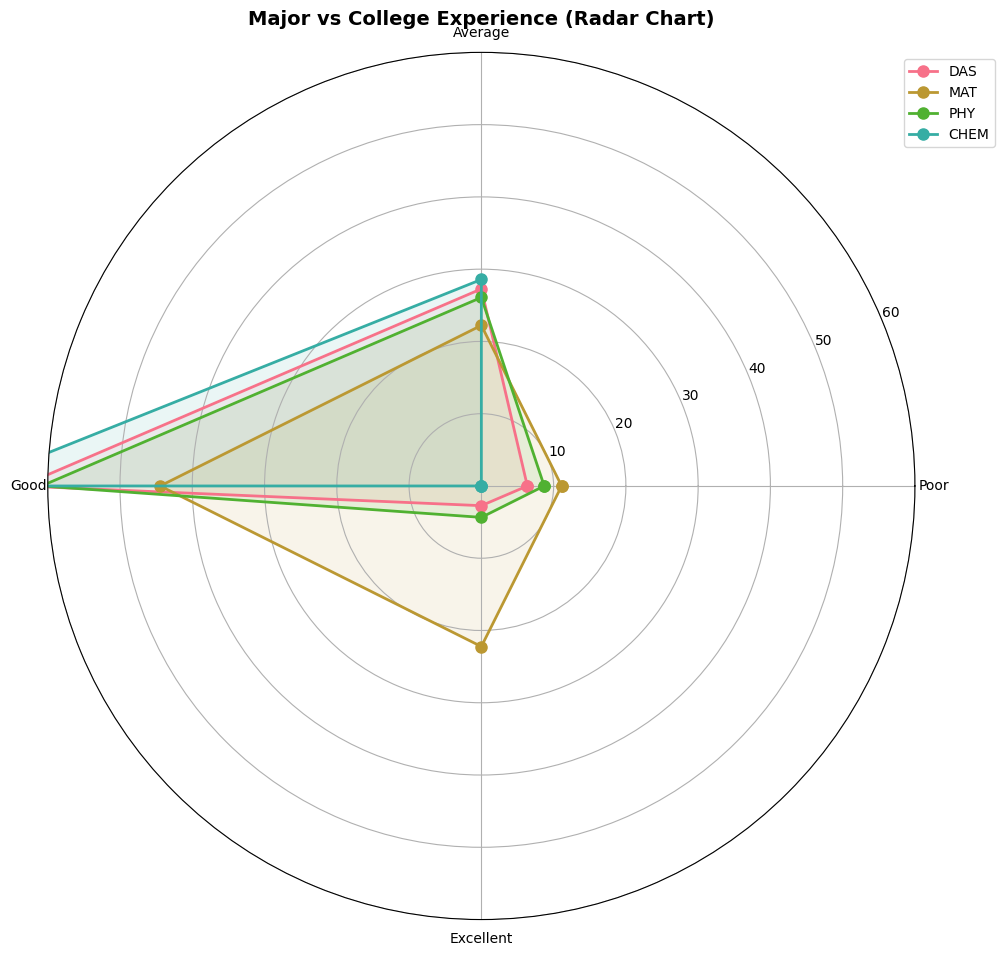

In [24]:
import numpy as np
# 3. MAJOR VS COLLEGE EXPERIENCE

# Plot 5.1: Radar Chart for Major vs College Experience
plt.figure(figsize=(10, 8))
majors = df['Major'].unique()
exp_categories = ['Poor', 'Average', 'Good', 'Excellent']

# Prepare data for radar chart
angles = np.linspace(0, 2*np.pi, len(exp_categories), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for major in majors:
    major_data = df[df['Major'] == major]
    exp_counts = major_data['College_experience'].value_counts().reindex(exp_categories, fill_value=0)
    exp_percentage = (exp_counts / exp_counts.sum() * 100).tolist()
    exp_percentage += exp_percentage[:1]  # Complete the circle
    
    ax.plot(angles, exp_percentage, 'o-', linewidth=2, label=major, markersize=8)
    ax.fill(angles, exp_percentage, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(exp_categories)
ax.set_ylim(0, 60)
ax.set_title('Major vs College Experience (Radar Chart)', fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.1, 1.0))
plt.tight_layout()
plt.show()



In [25]:
#PHY: Best overall experience (largest "Good/Excellent" area)

#CHEM & MAT: Moderate satisfaction (smaller radar area)

#DAS: Most balanced but smaller "Excellent" segment

#Poor ratings: Minimal across all majors

#Key Insight: Physics students happiest, all majors generally satisfied with college experience

In [26]:
import networkx as nx
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

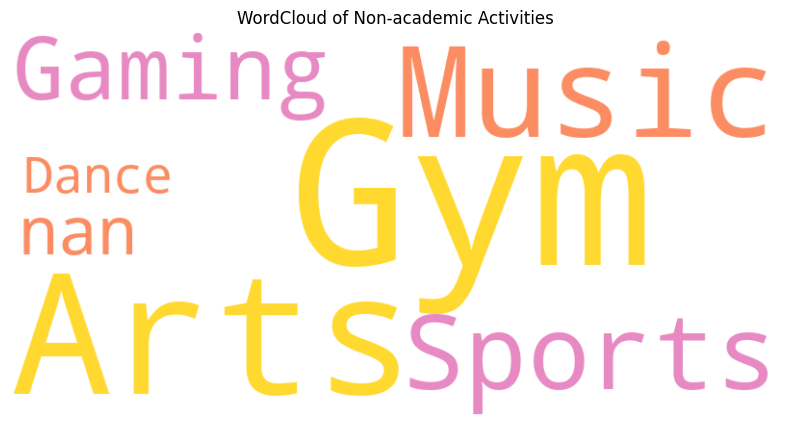

In [27]:
# 6. WordCloud for Non-academic Activities
text = " ".join(df["nonacademic_activities"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="Set2").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Non-academic Activities")
plt.show()

In [28]:
#INFERENCE
#The largest words (Gym, Arts, Sports, Music) indicate these are the most common activities.

#Medium-sized words (Gaming, Dance) are also fairly popular.

#There’s a small “nan” entry, which likely represents missing or unrecorded data.

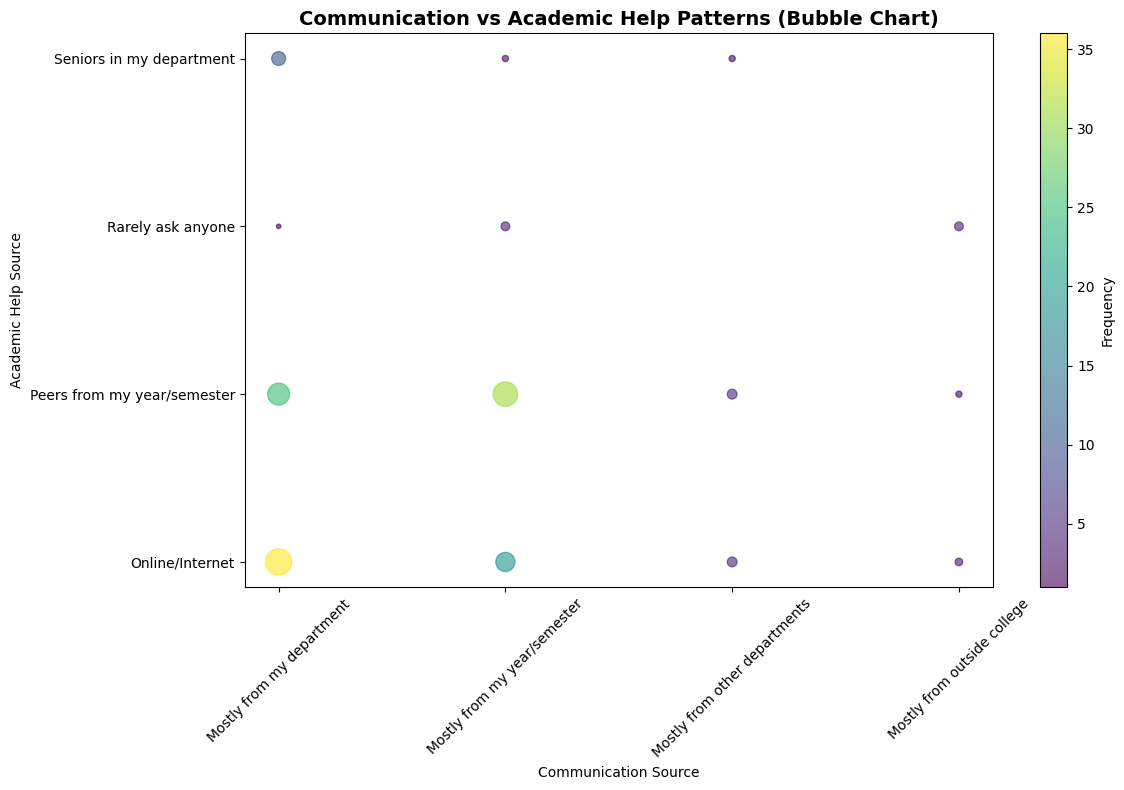

In [29]:
# Plot 6.3: Bubble Chart - Communication vs Academic Help
plt.figure(figsize=(12, 8))
comm_help = df.groupby(['Communication', 'Academic_help']).size().reset_index(name='count')

# Create bubble chart
scatter = plt.scatter(
    x=pd.Categorical(comm_help['Communication']).codes,
    y=pd.Categorical(comm_help['Academic_help']).codes,
    s=comm_help['count']*10,  # Size represents frequency
    alpha=0.6,
    c=comm_help['count'],
    cmap='viridis'
)

plt.colorbar(scatter, label='Frequency')
plt.xticks(range(len(comm_help['Communication'].unique())), 
           comm_help['Communication'].unique(), rotation=45)
plt.yticks(range(len(comm_help['Academic_help'].unique())), 
           comm_help['Academic_help'].unique())
plt.xlabel('Communication Source')
plt.ylabel('Academic Help Source')
plt.title('Communication vs Academic Help Patterns (Bubble Chart)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



In [30]:
#inference
#The bubble chart shows that students most frequently seek academic help online or from peers in their own department or year/semester, rather than from seniors, other departments, or rarely asking anyone for help.
#Communication and help-seeking occur predominantly within their own groups, especially online and among peers, based on the larger bubble sizes and higher frequencies seen in those categories

In [31]:
# 9. Interactive Network Graph (Majors & Communication Preferences)
G = nx.Graph()
for pref in df["Communication"].unique():
    G.add_node(pref, type="communication")
for major in df["Major"].unique():
    G.add_node(major, type="major")
for _, row in df.iterrows():
    G.add_edge(row["Major"], row["Communication"])

pos = nx.spring_layout(G, seed=42)
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(x=edge_x, y=edge_y,
                        line=dict(width=0.5, color='red'),
                        hoverinfo='none', mode='lines')

node_x, node_y, node_text = [], [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text',
                        text=node_text, textposition="top center",
                        hoverinfo='text',
                        marker=dict(size=20, color="orange", line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title="Interactive Network Graph",
                                 showlegend=False,
                                 hovermode='closest'))
fig.show()

In [32]:
#INFERENCE
#The groups "Mostly from my year/semester" and "Mostly from my department" are positioned centrally among the subjects (MAT, DAS, PHY, CHEM). This indicates that students taking these courses primarily communicate with their peers from the same academic year, semester, or department.

#The group "Mostly from other departments" is located near the subjects MAT, PHY, and CHEM, suggesting that students in these fields are likely to communicate with peers from different departments.

#The group "Mostly from outside college" is an outlier, located far from all the subjects. This implies that a student's communication with people outside of college is a separate social sphere and is not related to the subjects they study.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4160\3929952824.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




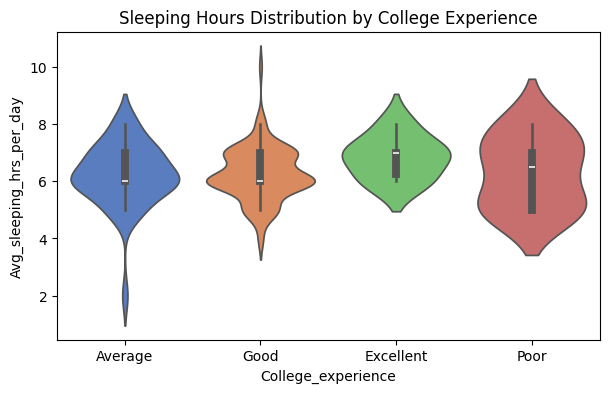

In [33]:
# 10. Violin Plot: Sleeping Hours vs College Experience
plt.figure(figsize=(7,4))
sns.violinplot(data=df, x="College_experience", y="Avg_sleeping_hrs_per_day", palette="muted", inner="box")
plt.title("Sleeping Hours Distribution by College Experience")
plt.show()

In [34]:
#INFERENCE
#Students who rated their college experience as "Poor" tend to get the least amount of sleep, with a low median and a wide distribution suggesting many are getting very few hours.

#Students with an "Excellent" college experience have a more consistent sleeping pattern, centered around a slightly higher number of hours compared to other groups.

#The sleeping hours for students with "Average" and "Good" experiences are distributed similarly, with a median around 6-7 hours, but they both have a significant number of people getting very little sleep.

#In general, there's a trend showing that a more positive college experience is associated with a more consistent and slightly higher amount of sleep.
